In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('TaxiData.csv')

# print(df['pickup_longitude'].isna().sum())
df['trip_seconds'] = df['trip_seconds'].fillna(0)

# df.sort_values(by='trip_miles')

## 4.a

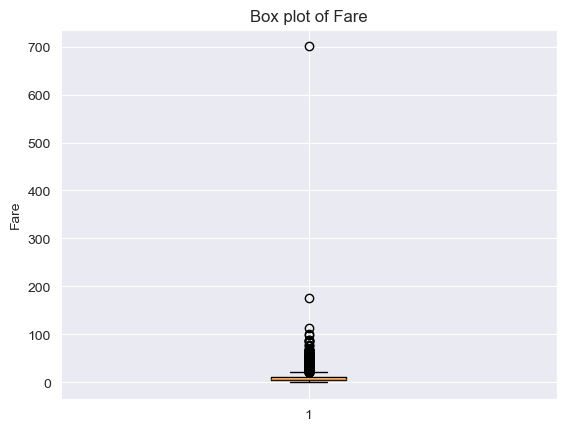

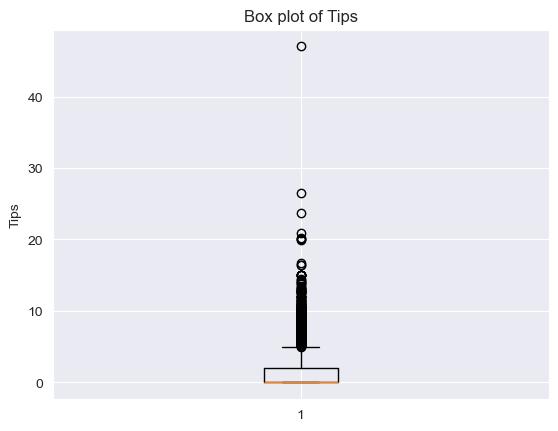

In [3]:
# Box plot for fare
plt.boxplot(df['fare'])
plt.title('Box plot of Fare')
plt.ylabel('Fare')
# plt.savefig('4a_1.png')
plt.show()
plt.close()

# Box plot for tips
plt.boxplot(df['tips'])
plt.title('Box plot of Tips')
plt.ylabel('Tips')
# plt.savefig('4a_2.png')
plt.show()
plt.close()


Here, outliers in both fare and tips greatly increase the average calculations due to their large magnitude.

For handling these outliers, we are going to remove them in the future using Z - scores.
A Z-score (or standard score) measures how many standard deviations a data point is from the mean of its distribution. It helps identify how unusual or "outlier-like" a value is in a dataset.

Here’s the formula for the Z-score of a value x:
$Z = \dfrac{x - \mu}{\sigma}$

$\mu$ = mean and $\sigma$ = standard deviation.

In [4]:
from scipy import stats

def remove_outliers(dataframe, threshold=3):
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(dataframe))
    # Apply the threshold to each row
    mask = (z_scores < threshold).all(axis=1)
    dataframe = dataframe[mask]
    
    return dataframe

## 4.b

In [5]:
# The first two rows of `df` have null entries of latitude and longitude
# For the regression, these two entries are removed
df_main = df[['trip_seconds', 'trip_miles', 'pickup_latitude', 'pickup_longitude', 'fare']].tail(-2)
df_main.head()

,trip_seconds,trip_miles,pickup_latitude,pickup_longitude,fare
2,1380.0,12.6,41.836150,-87.648788,27.05
3,180.0,0.0,41.985015,-87.804532,5.85
4,1080.0,0.0,41.968069,-87.721559,16.65
5,780.0,6.9,41.983636,-87.723583,16.45
6,1200.0,15.4,41.953582,-87.723452,32.05


In [6]:
from sklearn.decomposition import PCA

# Select the columns for PCA
coords = df_main[['pickup_latitude', 'pickup_longitude']]

# Apply PCA
pca = PCA(n_components=1)
coords_pca = pca.fit_transform(coords)

# Add the PCA result back to the dataframe
df_main['coords_pca'] = coords_pca

df_main.head()

,trip_seconds,trip_miles,pickup_latitude,pickup_longitude,fare,coords_pca
2,1380.0,12.6,41.836150,-87.648788,27.05,-0.031304
3,180.0,0.0,41.985015,-87.804532,5.85,0.166235
4,1080.0,0.0,41.968069,-87.721559,16.65,0.082510
5,780.0,6.9,41.983636,-87.723583,16.45,0.089781
6,1200.0,15.4,41.953582,-87.723452,32.05,0.079290


In [7]:
# Applying the Z-score threshold as 2.5 as that was the most suitable
df1_cleaned = remove_outliers(df_main, 2.5)

# Perform linear regression on the cleaned data
from sklearn import linear_model

features = ['trip_seconds', 'trip_miles', 'pickup_latitude', 'pickup_longitude']
target = 'fare'

X = df1_cleaned[features].values.reshape(-1, len(features))
y = df1_cleaned[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print(len(df_main), len(df1_cleaned))

15000 13416


In [8]:
from sklearn.metrics import mean_squared_error

print(f"RMSE = {np.sqrt(mean_squared_error(y, model.predict(X)))}")
print(f"R^2 = {model.score(X, y)}")


RMSE = 2.860523621106582
R^2 = 0.803965165417579


<Axes: >

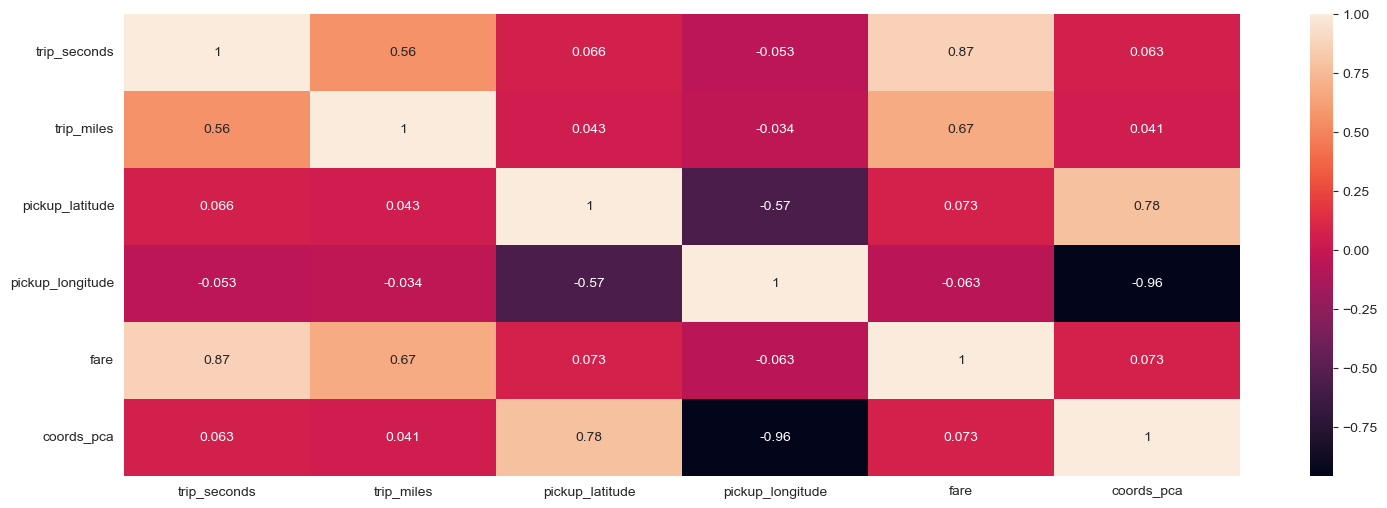

In [9]:
# Correlation Matrix for Testing Data
import seaborn as sns

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(df1_cleaned.corr(), annot=True)

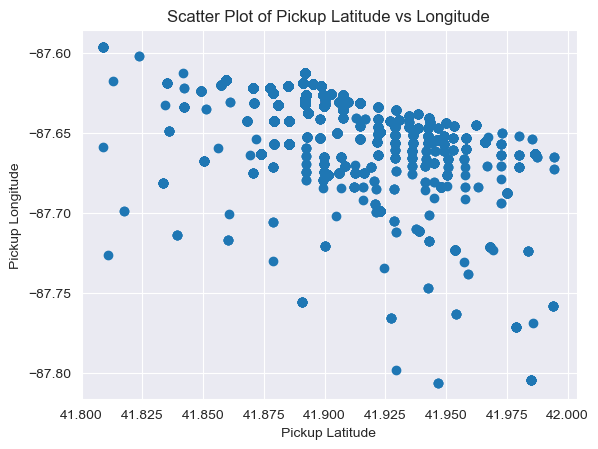

In [11]:
plt.scatter(df1_cleaned['pickup_latitude'], df1_cleaned['pickup_longitude'])
plt.xlabel('Pickup Latitude')
plt.ylabel('Pickup Longitude')
plt.title('Scatter Plot of Pickup Latitude vs Longitude')
plt.show()
plt.close()